In [2]:
import pandas as pd
import numpy as np
import re
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.utils import to_categorical
# from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
df = pd.read_csv('movies_images/train.csv')
df.shape

(7254, 27)

In [4]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
images_list = []
for i in range(0, df.shape[0]):
    img = image.load_img('./movies_images/Images/' + df['Id'][i] + '.jpg')
    img = image.img_to_array(img)
    img = img/255
    images_list.append(img)

In [6]:
def getMinSize(images_list):
    min_width = 100000;
    min_height = 100000;
    
    for i in range(0, len(images_list)):
        if (images_list[i].shape[0] < min_width):
            min_width = images_list[i].shape[0]
        if (images_list[i].shape[1] < min_height):
            min_height = images_list[i].shape[1]
            
    return min_width, min_height

In [7]:
size = getMinSize(images_list)
size

(132, 89)

In [8]:
images_list_resized = [image.smart_resize(img, size) for img in images_list]

In [9]:
X = np.array(images_list_resized)
X.shape

(7254, 132, 89, 3)

In [10]:
y = np.array(df.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=images_list_resized[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(25, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 85, 16)       1216      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 42, 16)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 42, 16)        0         
                                                                 
 dropout_5 (Dropout)         (None, 64, 42, 16)        0         
                                                                 
 flatten_1 (Flatten)         (None, 43008)             0         
                                                                 
 dense_1 (Dense)             (None, 25)                1075225   
                                                      

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [21]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
91/91 [==============================] - 7s 73ms/step - loss: 0.2661 - accuracy: 0.2466 - val_loss: 0.2450 - val_accuracy: 0.3349
Epoch 2/10
91/91 [==============================] - 6s 68ms/step - loss: 0.2333 - accuracy: 0.3017 - val_loss: 0.2450 - val_accuracy: 0.3122
Epoch 3/10
91/91 [==============================] - 6s 68ms/step - loss: 0.2156 - accuracy: 0.3483 - val_loss: 0.2467 - val_accuracy: 0.2453
Epoch 4/10
91/91 [==============================] - 6s 69ms/step - loss: 0.1844 - accuracy: 0.3900 - val_loss: 0.2549 - val_accuracy: 0.2867
Epoch 5/10
91/91 [==============================] - 6s 70ms/step - loss: 0.1502 - accuracy: 0.4132 - val_loss: 0.2709 - val_accuracy: 0.2529
Epoch 6/10
91/91 [==============================] - 6s 68ms/step - loss: 0.1207 - accuracy: 0.4301 - val_loss: 0.2979 - val_accuracy: 0.2777
Epoch 7/10
91/91 [==============================] - 6s 68ms/step - loss: 0.0999 - accuracy: 0.4470 - val_loss: 0.3160 - val_accuracy: 0.2798
Epoch 8/10
91

In [158]:
def getTopLabels(pred, all_tokens):
    df = pd.DataFrame(columns=all_tokens)
    df.loc[0] = pred[0]
    
    labels = list(df.iloc[:, np.argsort(df.loc[0])].columns[-3:])
    labels.reverse()
    values = list(df.iloc[0, np.argsort(df.loc[0])][-3:])
    values.reverse()
    
    return labels, values

In [159]:
genres = df.drop(columns=['Id', 'Genre']).columns

In [160]:
# Predict top 3 labels for the first movie image
pred = model.predict(np.array([images_list_resized[0]]))
labels, values = getTopLabels(pred, genres)
print(labels)
print(values)

1/1 [==============================] - 0s 38ms/step
['Drama', 'Thriller', 'Action']
[0.5940009951591492, 0.251910924911499, 0.22520415484905243]


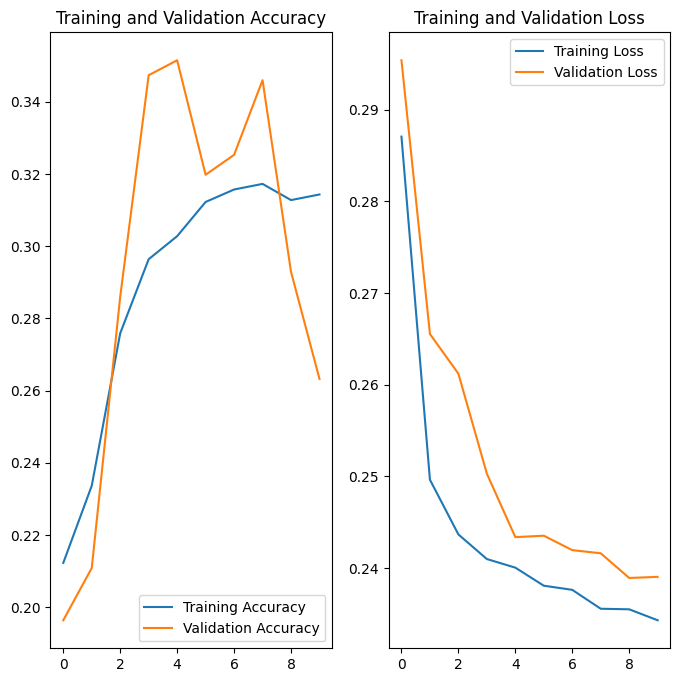

In [161]:
acc = history.history['accuracy']
len(acc)
val_acc = history.history['val_accuracy']
len(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
loss = model.evaluate(X_test, y_test, verbose=0)
loss

[0.37161681056022644, 0.26671260595321655]

In [163]:
model.save('model-movie-genre.h5')

/Users/stefaniamindoiu/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [164]:
np.save('genres', list(genres))
np.load('genres.npy')

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'], dtype='<U11')